In [1]:
import numpy as np
import pandas as pd 


In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4586,ham,"I'll see if I can swing by in a bit, got some ...",NaN,NaN,NaN
4017,ham,"\GRAN ONLYFOUND OUT AFEW DAYS AGO.CUSOON HONI\""""",NaN,NaN,NaN
1053,ham,Jay's getting really impatient and belligerent,NaN,NaN,NaN
3444,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...,NaN,NaN,NaN
4176,ham,Ok lor then we go tog lor...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

**Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
2215,ham,Prabha..i'm soryda..realy..frm heart i'm sory
3532,ham,"Sorry, I'll call later"
3014,ham,&lt;#&gt; mins but i had to stop somewhere f...
2112,spam,You are a winner you have been specially selec...
5340,ham,Are u awake? Is there snow there?


In [8]:
df.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)
df.sample(5)

,Target,Text
3622,ham,"Damn, poor zac doesn't stand a chance"
1584,ham,"Sorry, I'll call later"
1160,ham,You sure your neighbors didnt pick it up
4997,ham,Can you talk with me..
1136,spam,Dont forget you can place as many FREE Request...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['Target'] = encoder.fit_transform(df['Target'])

In [11]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

**EDA**

In [17]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

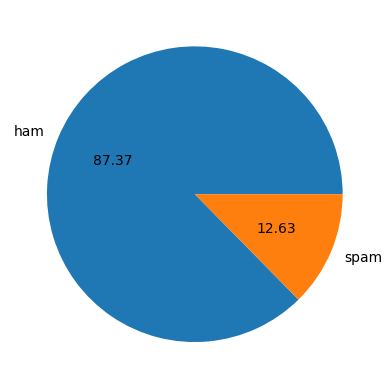

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
df['Num_Characters'] =  df['Text'].apply(len)
df.head()

,Target,Text,Num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['Num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,Num_Characters,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['Num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,Num_Characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df.describe()

,Target,Num_Characters,Num_words,Num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.286129,1.961308
std,0.332253,58.236293,13.226400,1.432583
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,219.000000,38.000000


In [26]:
#ham
df[df['Target']==0][['Num_Characters','Num_words','Num_sentences']].describe()

,Num_Characters,Num_words,Num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [27]:
#spam
df[df['Target']==1][['Num_Characters','Num_words','Num_sentences']].describe()

,Num_Characters,Num_words,Num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [28]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Num_Characters', ylabel='Count'>

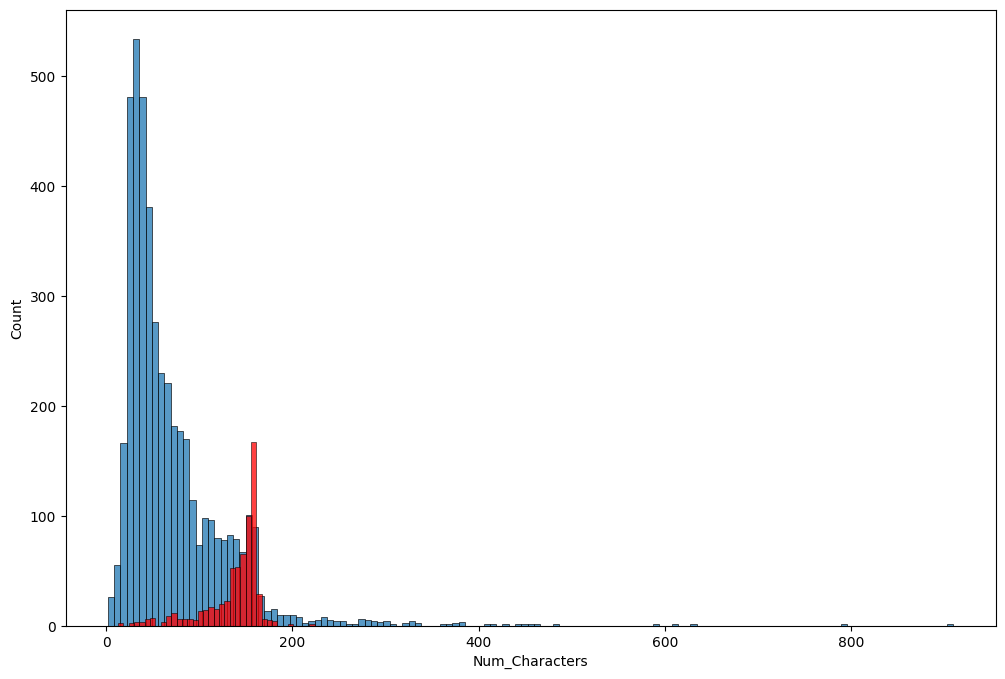

In [29]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['Target']==0]['Num_Characters'])
sns.histplot(df[df['Target']==1]['Num_Characters'],color='red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Num_words', ylabel='Count'>

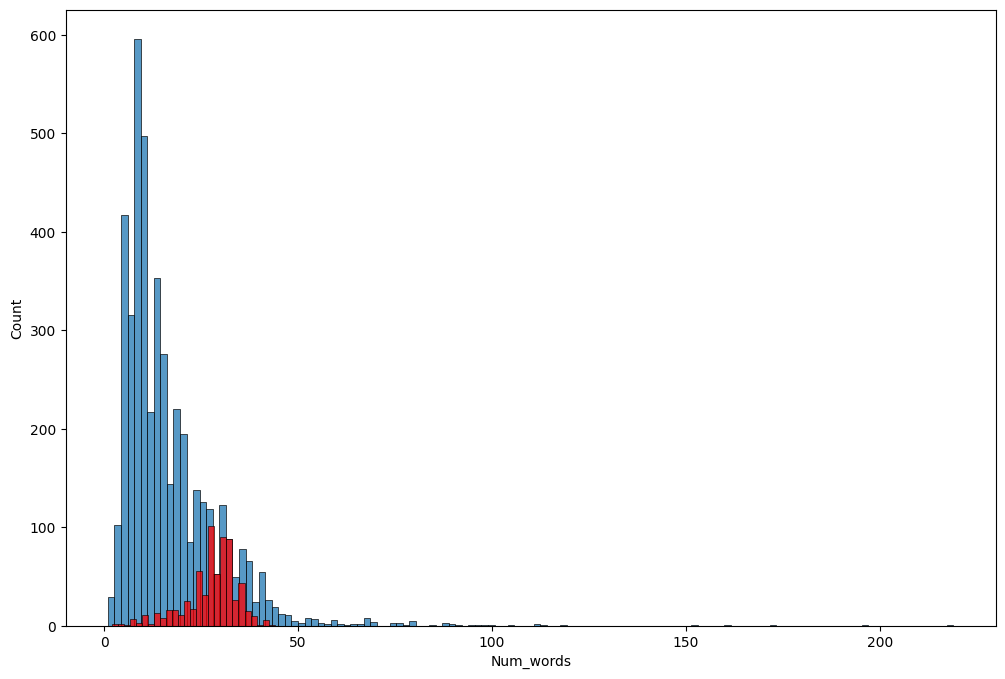

In [30]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['Target']==0]['Num_words'])
sns.histplot(df[df['Target']==1]['Num_words'],color='red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

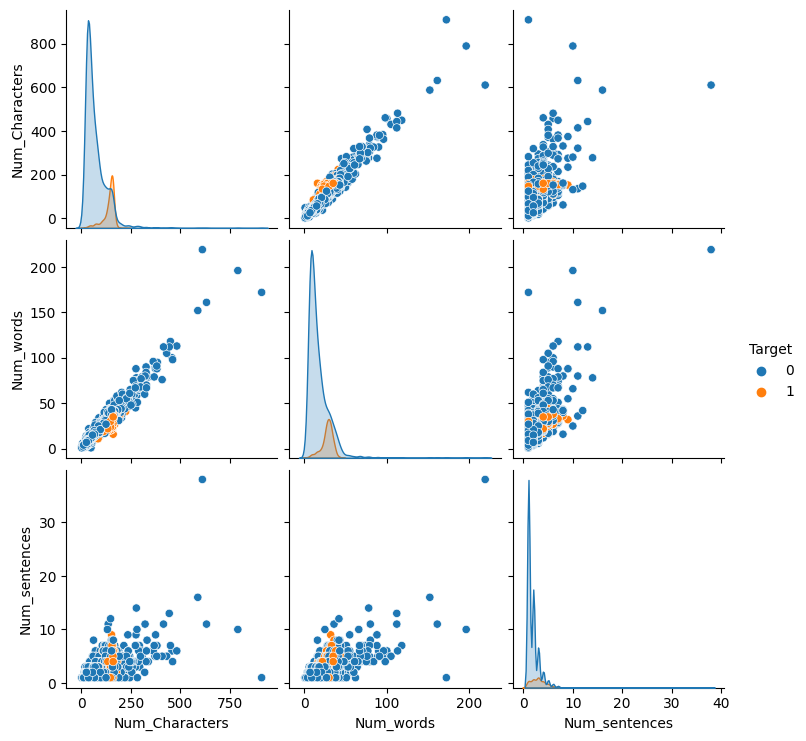

In [31]:
sns.pairplot(df,hue='Target')

<Axes: >

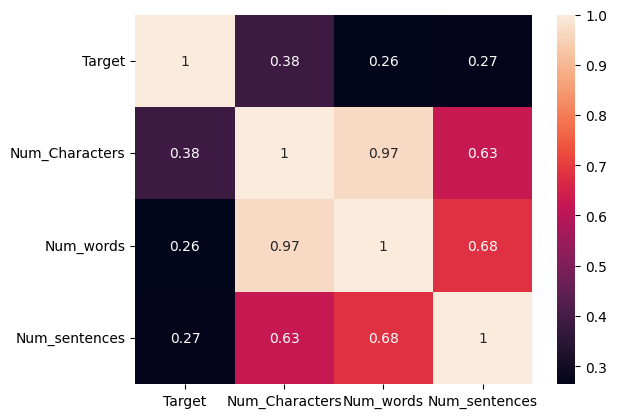

In [32]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

**Data Preprocessing**

In [33]:
df.head()

,Target,Text,Num_Characters,Num_words,Num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
import string 

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [36]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [37]:
df.head()

,Target,Text,Num_Characters,Num_words,Num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [39]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

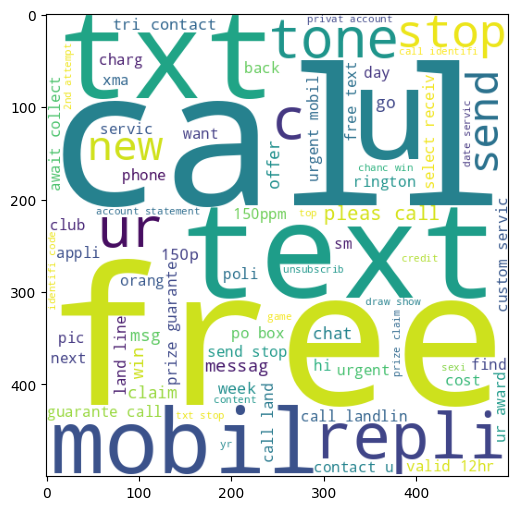

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [41]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

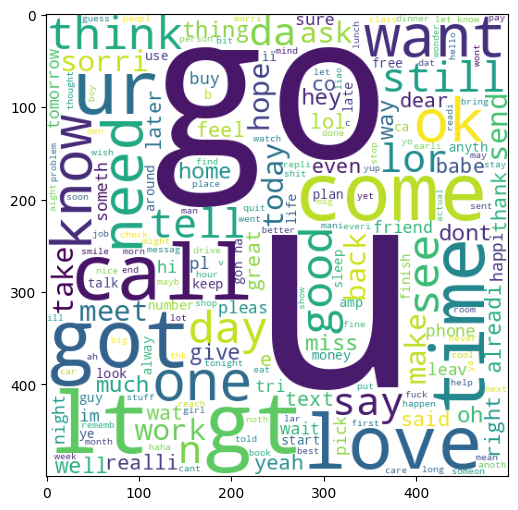

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [43]:
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [44]:
len(spam_corpus)

9883

In [45]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

<function matplotlib.pyplot.show(close=None, block=None)>

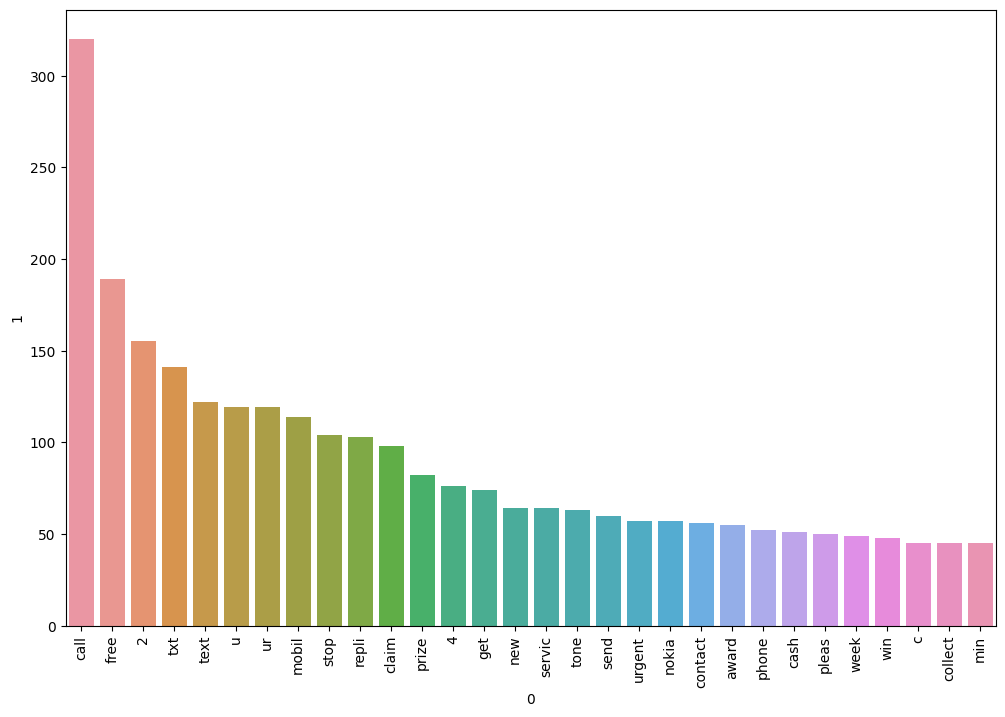

In [46]:
plt.figure(figsize=(12,8))
sns.barplot(x=spam_df[0],y=spam_df[1])
plt.xticks(rotation='vertical')
plt.show

In [47]:
ham_corpus = []
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [48]:
len(ham_corpus)

34771

In [49]:
from collections import Counter
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

<function matplotlib.pyplot.show(close=None, block=None)>

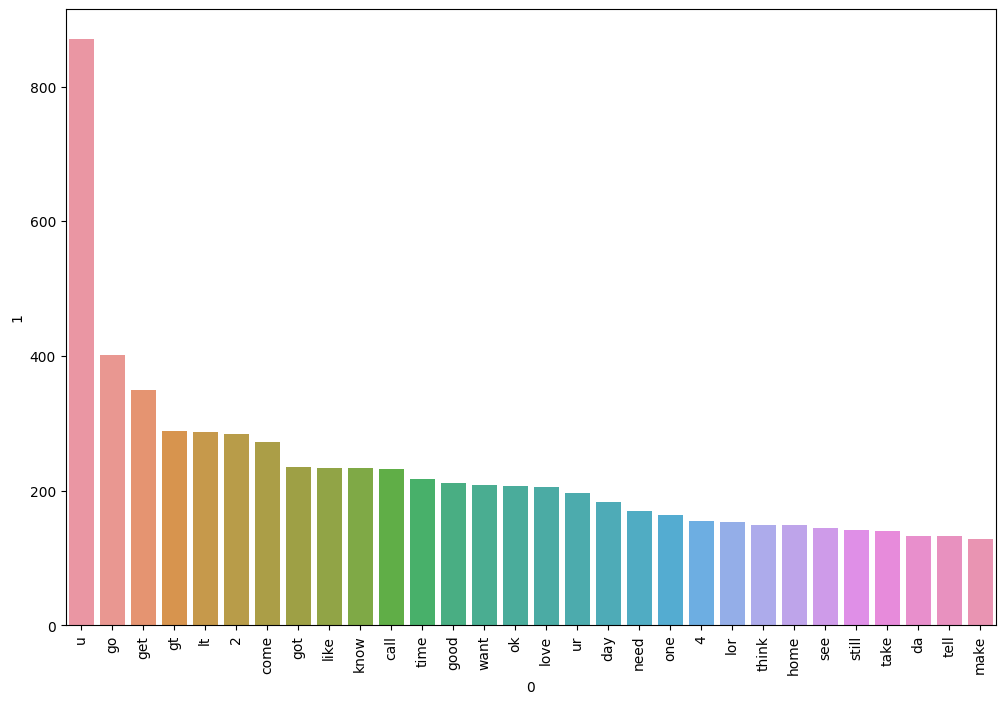

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x=ham_df[0],y=ham_df[1])
plt.xticks(rotation='vertical')
plt.show

**Model**

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

*Countvectorizer*

In [52]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [53]:
X.shape

(5169, 6629)

In [54]:
y = df['Target'].values

In [55]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[786 110]
 [ 20 118]]
0.5175438596491229


In [61]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [62]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


*tfidf-Vectorizer*

In [63]:
X_v = tfidf.fit_transform(df['transformed_text']).toarray()

In [64]:
X_v.shape

(5169, 6629)

In [65]:
y_v = df['Target'].values

In [66]:
y_v

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
X_v_train, X_v_test, y_v_train, y_v_test = train_test_split(X_v,y_v,test_size=0.2,random_state=2)

In [68]:
gnb.fit(X_v_train, y_v_train)
y_v_pred1 = gnb.predict(X_v_test)
print(accuracy_score(y_v_test,y_v_pred1))
print(confusion_matrix(y_v_test,y_v_pred1))
print(precision_score(y_v_test,y_v_pred1))

0.8704061895551257
[[787 109]
 [ 25 113]]
0.509009009009009


In [69]:
mnb.fit(X_v_train, y_v_train)
y_v_pred2 = mnb.predict(X_v_test)
print(accuracy_score(y_v_test,y_v_pred2))
print(confusion_matrix(y_v_test,y_v_pred2))
print(precision_score(y_v_test,y_v_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [70]:
bnb.fit(X_v_train, y_v_train)
y_v_pred3 = bnb.predict(X_v_test)
print(accuracy_score(y_v_test,y_v_pred3))
print(confusion_matrix(y_v_test,y_v_pred3))
print(precision_score(y_v_test,y_v_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158


***Model_Comparisons***

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [75]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_v_train,y_v_train,X_v_test,y_v_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9661016949152542
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9320388349514563
For  RF
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9298245614035088
For  BgC
Accuracy -  0.960348162475822
Precision -  0.875968992248062
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.8928571428571429
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9354838709677419


In [76]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [77]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.976789,0.991379
8,ETC,0.975822,0.974790
0,SVC,0.972921,0.966102
10,xgb,0.970986,0.935484
4,LR,0.952611,0.932039
6,AdaBoost,0.961315,0.929825
9,GBDT,0.951644,0.892857
7,BgC,0.960348,0.875969


**best model = Multibinnomila Naive Bayes**

In [78]:
#for checking
X_v = tfidf.fit_transform(df['transformed_text']).toarray()
y_v = df['Target'].values
X_v_train, X_v_test, y_v_train, y_v_test = train_test_split(X_v,y_v,test_size=0.2,random_state=2)
mnb.fit(X_v_train, y_v_train)
y_v_pred2 = mnb.predict(X_v_test)
print(accuracy_score(y_v_test,y_v_pred2))
print(confusion_matrix(y_v_test,y_v_pred2))
print(precision_score(y_v_test,y_v_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [79]:
final_model = mnb

In [80]:
df.head(10)

,Target,Text,Num_Characters,Num_words,Num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,30,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [81]:
def predictions(text):
    transformed_sms = transform_text(text)
    vector = tfidf.transform([transformed_sms])
    result = final_model.predict(vector)[0]
    
    if result==1:
        print('Spam')
    else:
        print('Not Spam')
        
text1 = 'my name is Arrow'
predictions(text1)

Not Spam


In [82]:
text2 = df['Text'][2]
predictions(text2)

Spam


In [83]:
text3 = 'Congratulations you won 1000 call on this number to get your prize'
predictions(text3)

Spam


In [84]:
text4 = 'You could be entitled up to $3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for infor or STOP to opt out'
predictions(text4)

Spam


In [85]:
text5 = 'I am free today, lets go out for a movie'
predictions(text5)

Not Spam
